#Линейная модель и градиентный спуск


## Линейная модель

Линейная модель - это математическая модель, используемая в машинном обучении для предсказания значений на основе линейной комбинации входных признаков. Она предполагает, что выходное значение (прогноз) можно выразить как взвешенную сумму входных признаков с добавлением смещения (bias). Математически это можно записать следующим образом:


$\hat{y} = w_1x_1 + w_2x_2 + \ldots + w_nx_n + b$

где:
- $\hat{y}$ - прогнозируемое значение,
- $w_1, w_2, \ldots, w_n$ - веса (параметры) модели для каждого признака,
- $x_1, x_2, \ldots, x_n$ - входные признаки,
- $b$ - смещение (bias).

### Вычисление выхода линейной модели

Для вычисления выхода линейной модели, просто подставьте значения признаков в уравнение, используя соответствующие веса и смещение. Матричная формула для вычисления выхода линейной модели для набора данных \(X\) выглядит следующим образом:

$\hat{Y} = X \cdot \mathbf{w} + b$

где:
- $\hat{Y}$ - вектор прогнозов для всего набора данных,
- $X$ - матрица признаков, где каждая строка представляет один образец, а столбцы - признаки,
- $\mathbf{w}$ - вектор весов модели,
- $b$ - смещение (bias).

### Обучение линейной модели

Обучение линейной модели заключается в настройке параметров (весов и смещения) так, чтобы они наилучшим образом соответствовали обучающим данным. Одним из наиболее распространенных методов обучения линейной модели является градиентный спуск.

### Градиентный спуск

Градиентный спуск - это метод оптимизации, используемый для обновления параметров модели с целью минимизации функции потерь. Функция потерь оценивает, насколько хорошо модель предсказывает реальные значения на обучающих данных.

Для линейной регрессии, часто используется среднеквадратичная ошибка (Mean Squared Error - MSE) в качестве функции потерь:

$MSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2$

где:
- $N$ - количество обучающих примеров,
- $y_i$ - реальное значение для i-го примера,
- $\hat{y}_i$ - прогнозированное значение для i-го примера.

### Корректировка весов модели

Для обновления весов модели в методе градиентного спуска, используется градиент функции потерь по отношению к параметрам модели. Градиент показывает направление наибольшего увеличения функции потерь, поэтому мы двигаемся в противоположном направлении градиента, чтобы уменьшить потери. Формула для обновления весов выглядит следующим образом:

$\mathbf{w}_{\text{новые}} = \mathbf{w}_{\text{старые}} - \text{learning_rate} \cdot \nabla L$

где:
- $\mathbf{w}_{\text{новые}}$ - новые веса после обновления,
- $\mathbf{w}_{\text{старые}}$ - текущие веса,
- $\text{learning_rate}$ - скорость обучения (коэффициент, контролирующий размер шага градиентного спуска),
- $\nabla L$ - градиент функции потерь по параметрам модели.

Этот процесс повторяется до достижения сходимости или определенного числа итераций.

## Классификатор на линейной модели

На линейной модели можно построить и классификатор. Для этого нужно выход линейной модели отбразить в интервал от 0 до 1. В этом нам поможет логистическая функция:

$\sigma(z) = \frac{1}{1 + e^{-z}}$

Для обучения скорректируем функцию потерь. Нетрудно показать, что функция, называемая кросс-энтропией на самом деле соответствует максимизации правдоподобия (кстати, почитайте про правдоподобие), ниже представлено выражение для нее

$BCE = -\frac{1}{N} \sum_{i=1}^{N} \left(y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)\right)$

где:
- $N$ - количество обучающих примеров,
- $y_i$ - истинная метка класса (0 или 1) для i-го примера,
- $\hat{y}_i$ - вероятность принадлежности к классу 1 для i-го примера (выход сигмоидной функции).

Будем считать, что модель относит объект к 1 классу, если ее выход $>=0.5$, иначе - 0 класс.

## Как считать градиенты

Приведу градиент для кросс-энтропии:

$\nabla_{\mathbf{w}} \text{BCE} = -\frac{1}{N} \mathbf{X}^T (\mathbf{y} - \hat{\mathbf{y}})$

Для MSE вычислить градиент самостоятельно

In [27]:
import numpy as np
import matplotlib.pyplot as plt


class LinearModel:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = np.zeros(num_features)
        self.bias = 0.0

    def __call__(self, X):
        return np.dot(X, self.weights) + self.bias


class LinearRegressor(LinearModel):
    def fit(self, X, y, learning_rate=0.01, epochs=100):
        error_history = []
        for _ in range(epochs):
            predictions = self(X)
            error = y - predictions
            gradient = -2 * np.dot(X.T, error) / len(X)
            self.weights -= learning_rate * gradient
            self.bias -= learning_rate * np.mean(error)
            current_error = ((y - predictions) ** 2).sum()
            error_history.append(current_error)
        return error_history

    def predict(self, X):
        return self(X)


class LinearClassifier(LinearModel):
    def fit(self, X, y, learning_rate=0.01, epochs=100):
        error_history = []
        for _ in range(epochs):
            predictions = self(X)
            sigmoid = 1 / (1 + np.exp(-predictions))
            error = y - sigmoid
            gradient = -np.dot(X.T, error) / len(X)
            self.weights -= learning_rate * gradient
            self.bias -= learning_rate * np.mean(error)
            current_error = -np.mean(y * np.log(sigmoid) + (1 - y) * np.log(1 - sigmoid))
            error_history.append(current_error)
        return error_history

    def predict(self, X):
        predictions = self(X)
        sigmoid = 1 / (1 + np.exp(-predictions))
        return np.round(sigmoid)

    def predict_proba(self, X):
        predictions = self(X)
        sigmoid = 1 / (1 + np.exp(-predictions))
        return sigmoid

## Проверьте модели на данных

### Линейная модель

#### Description:
The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

#### Variables:
- Hours Studied: The total number of hours spent studying by each student.
- Previous Scores: The scores obtained by students in previous tests.
- Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).
- Sleep Hours: The average number of hours of sleep the student had per day.
- Sample Question Papers Practiced: The number of sample question papers the student practiced.

#### Target Variable:

- Performance Index: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import pandas as pd

In [30]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Student_Performance.csv')
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


проведем предобработку данных. узнаем типы данных в столбцах, проверим на пропуски и дубликаты. если есть пропуски, то заполним их, при наличии дубликатов - удалим.

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [32]:
data.isna().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [33]:
data.duplicated().sum()

np.int64(127)

In [34]:
data = data.drop_duplicates()

In [35]:
Y = data['Performance Index']
X = data.drop(['Performance Index'], axis=1)
X['Extracurricular Activities'] = X['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})
X = X.to_numpy()

<ipython-input-35-0889835156fc>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Extracurricular Activities'] = X['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})


In [36]:
# Вычислите среднее по столбцам.
mean = X.mean()

# Вычислите стандартное отклонение по столбцам.
std = X.std()

# Нормализуйте данные по столбцам (стандартное масштабирование).
normalized_X = (X - mean) / std

# Нормализуйте и выходные данные
mean_y = Y.mean()
std_y = Y.std()
normalized_Y = (Y - mean_y) / std_y

In [37]:
lr = LinearRegressor(num_features=normalized_X.shape[1])
history = lr.fit(normalized_X, normalized_Y,
                learning_rate=0.01,
                epochs=1000)

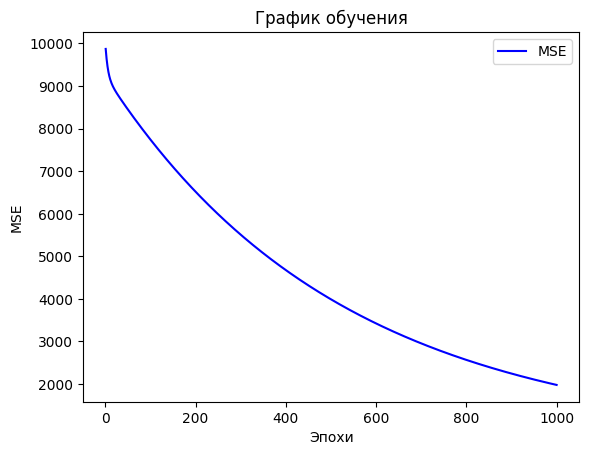

In [38]:
epochs = range(1, len(history) + 1)

# Постройте график обучения.
plt.plot(epochs, history, 'b', label='MSE')
plt.title('График обучения')
plt.xlabel('Эпохи')
plt.ylabel('MSE')
plt.legend()

# Отобразите график.
plt.show()

### Классификатор
#### Context
When a bank receives a loan application, based on the applicant’s profile the bank has to make a decision regarding whether to go ahead with the loan approval or not. Two types of risks are associated with the bank’s decision."

"If the applicant is a good credit risk, i.e. is likely to repay the loan, then not approving the loan to the person results in a loss of business to the bank
If the applicant is a bad credit risk, i.e. is not likely to repay the loan, then approving the loan to the person results in a financial loss to the bank."

The predictors that may potentially have any influence on Creditability:

Account Balance: No account (1), None (No balance) (2), Some Balance (3)

Payment Status: Some Problems (1), Paid Up (2), No Problems (in this bank) (3)

Savings/Stock Value: None, Below 100 DM, [100, 1000] DM, Above 1000 DM

Employment Length: Below 1 year (including unemployed), [1, 4), [4, 7), Above 7

Sex/Marital Status: Male Divorced/Single, Male Married/Widowed, Female

No of Credits at this bank: 1, More than 1

Guarantor: None, Yes

Concurrent Credits: Other Banks or Dept Stores, None

ForeignWorker variable may be dropped from the study

Purpose of Credit: New car, Used car, Home Related, Other

In [39]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/german.csv', sep=';')
data

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,3,2,3,...,4,1,21,3,1,1,2,2,1,1
996,0,1,24,2,0,2303,1,5,4,3,...,1,1,45,3,2,1,3,1,1,1
997,0,4,21,4,0,12680,5,5,4,3,...,4,4,30,3,3,1,4,1,2,1
998,0,2,12,2,3,6468,5,1,2,3,...,1,4,52,3,2,1,4,1,2,1


проведем предобработку данных. узнаем типы данных в столбцах, проверим на пропуски и дубликаты. если есть пропуски, то заполним их, при наличии дубликатов - удалим.

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account_Balance                    1000 non-null   int64
 2   Duration_of_Credit_monthly         1000 non-null   int64
 3   Payment_Status_of_Previous_Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit_Amount                      1000 non-null   int64
 6   Value_Savings_Stocks               1000 non-null   int64
 7   Length_of_current_employment       1000 non-null   int64
 8   Instalment_per_cent                1000 non-null   int64
 9   Sex_Marital_Status                 1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration_in_Current_address        1000 non-null   int64
 12  Most_valuable_availab

In [41]:
data.isna().sum()

,0
Creditability,0
Account_Balance,0
Duration_of_Credit_monthly,0
Payment_Status_of_Previous_Credit,0
Purpose,0
Credit_Amount,0
Value_Savings_Stocks,0
Length_of_current_employment,0
Instalment_per_cent,0
Sex_Marital_Status,0


In [42]:
data.duplicated().sum()

np.int64(0)

In [43]:
Y = data['Creditability']
X = data.drop(['Creditability'], axis=1).to_numpy()

In [44]:
data.describe()

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [46]:
# Вычислите среднее по столбцам.
mean = X.mean()

# Вычислите стандартное отклонение по столбцам.
std = X.std()

# Нормализуйте данные по столбцам (стандартное масштабирование).
normalized_X = (X - mean) / std

mean_y = Y.mean()
std_y = Y.std()
normalized_Y = (Y - mean_y) / std_y

In [55]:
lc = LinearClassifier(num_features=normalized_X.shape[1])
history = lc.fit(normalized_X, normalized_Y,
                learning_rate=0.01,
                epochs=1000)

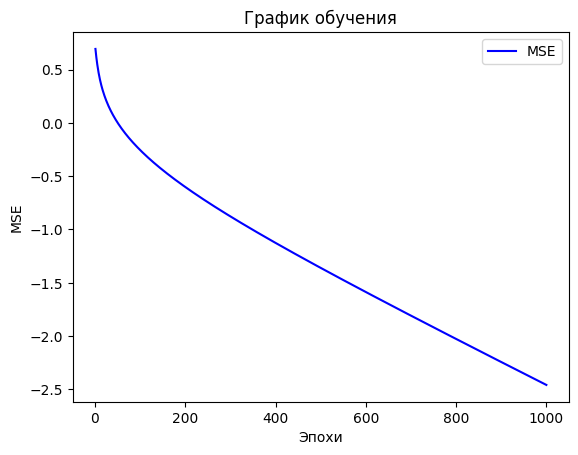

In [56]:
epochs = range(1, len(history) + 1)

# Постройте график обучения.
plt.plot(epochs, history, 'b', label='MSE')
plt.title('График обучения')
plt.xlabel('Эпохи')
plt.ylabel('MSE')
plt.legend()

# Отобразите график.
plt.show()

In [54]:
pred = lc.predict(normalized_X)
print('accuracy: ', (pred == Y).sum() / len(Y))

accuracy:  0.3


Вычислите для этой модели ROC-AUC, precision, recall и f1

#Готовые модели

## Классические алгоритмы без ансамблирования
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.75$ - 0 баллов
- $0.75 < AUC \leq 0.76$ - 2 балла
- $0.76 < AUC \leq 0.77$ - 4 балла
- $0.77 < AUC \leq 0.78$ - 6 баллов
- $0.78 < AUC \leq 0.79$ - 8 баллов
- $AUC > 0.79$ - 10 баллов

\
В этой работе запрещено использовать ансамбли моделей (лес, бустинги и т.д.)!

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [58]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/german.csv', sep=';')
print(data.head())

X = data.iloc[:, 1:].to_numpy()
y = data.iloc[:, 0].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                             3               

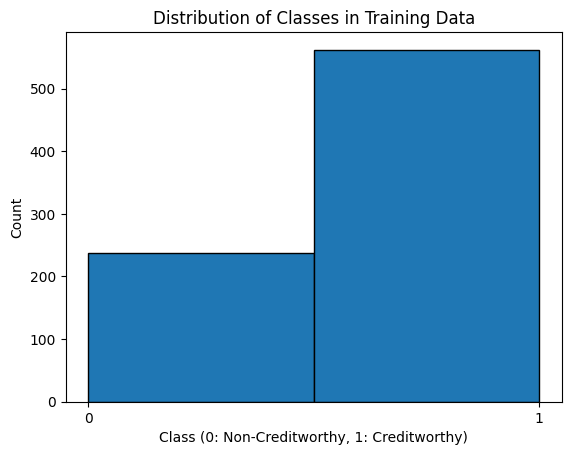

In [59]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

In [61]:
#масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
#масштабирование с MinMax для KNN
scaler_knn = MinMaxScaler()
X_train_scaled_knn = scaler_knn.fit_transform(X_train)
X_test_scaled_knn = scaler_knn.transform(X_test)

In [76]:
lr_params = {
    'C': np.logspace(-3, 3, 20),  # Более плотный поиск
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['saga'],  # Поддерживает все типы регуляризации
    'l1_ratio': [0.1, 0.5, 0.9] if 'elasticnet' in ['l1', 'l2', 'elasticnet'] else None,
    'class_weight': [None, 'balanced', {0: 1, 1: 3}]
}

lr_grid = GridSearchCV(
   LogisticRegression(max_iter=5000, random_state=42),
    param_grid=lr_params,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)
lr_grid.fit(X_train_scaled, y_train)

logistic_regression_model = lr_grid.best_estimator_

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


In [77]:
dt_params = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None],
    'ccp_alpha': [0, 0.001, 0.01, 0.1],
    'class_weight': [None, 'balanced']
}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                      dt_params, cv=5, scoring='roc_auc')
dt_grid.fit(X_train, y_train)
decision_tree_model = dt_grid.best_estimator_

In [78]:
knn_params = {
    'n_neighbors': np.arange(3, 31, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2, 3]  # Для minkowski
}
knn_grid = GridSearchCV(KNeighborsClassifier(),
                       knn_params, cv=5, scoring='roc_auc')
knn_grid.fit(X_train_scaled_knn, y_train)
knn_model = knn_grid.best_estimator_

In [79]:
y_prob_logistic = logistic_regression_model.predict_proba(X_test_scaled)[:, 1]
y_prob_decision_tree = decision_tree_model.predict_proba(X_test)[:, 1]
y_prob_knn = knn_model.predict_proba(X_test_scaled_knn)[:, 1]

y_pred_logistic = logistic_regression_model.predict(X_test_scaled)
y_pred_decision_tree = decision_tree_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test_scaled_knn)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

roc_auc_logistic = roc_auc_score(y_test, y_prob_logistic)
roc_auc_decision_tree = roc_auc_score(y_test, y_prob_decision_tree)
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)

precision_logistic = precision_score(y_test, y_pred_logistic)
precision_decision_tree = precision_score(y_test, y_pred_decision_tree)
precision_knn = precision_score(y_test, y_pred_knn)

recall_logistic = recall_score(y_test, y_pred_logistic)
recall_decision_tree = recall_score(y_test, y_pred_decision_tree)
recall_knn = recall_score(y_test, y_pred_knn)

print(f'Accuracy of Logistic Regression: {accuracy_logistic}')
print(f'Accuracy of Decision Tree: {accuracy_decision_tree}')
print(f'Accuracy of K-Nearest Neighbors: {accuracy_knn}')

print(f'ROC AUC of Logistic Regression: {roc_auc_logistic}')
print(f'ROC AUC of Decision Tree: {roc_auc_decision_tree}')
print(f'ROC AUC of K-Nearest Neighbors: {roc_auc_knn}')

print(f'Precision of Logistic Regression: {precision_logistic}')
print(f'Precision of Decision Tree: {precision_decision_tree}')
print(f'Precision of K-Nearest Neighbors: {precision_knn}')

print(f'Recall of Logistic Regression: {recall_logistic}')
print(f'Recall of Decision Tree: {recall_decision_tree}')
print(f'Recall of K-Nearest Neighbors: {recall_knn}')

Accuracy of Logistic Regression: 0.695
Accuracy of Decision Tree: 0.695
Accuracy of K-Nearest Neighbors: 0.75
ROC AUC of Logistic Regression: 0.7886863020102852
ROC AUC of Decision Tree: 0.7176834969611968
ROC AUC of K-Nearest Neighbors: 0.7779336138382422
Precision of Logistic Regression: 0.6934673366834171
Precision of Decision Tree: 0.7851851851851852
Precision of K-Nearest Neighbors: 0.7558139534883721
Recall of Logistic Regression: 1.0
Recall of Decision Tree: 0.7681159420289855
Recall of K-Nearest Neighbors: 0.9420289855072463


## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели